# WiDS Datathon 2023

The purpose of this notebook is to run differnet regressor model experiements on our cleaned data from the preprocessor notebook.
___

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Regression Libraries libraries
import lightgbm as lgb
from sklearn. linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor

# Other ML Librariesx
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold

# Reading data
___

In [ ]:
# Reading the clean train dataset
# train_df = pd.read_csv('/kaggle/input/widsdatathon2023/train_data.csv') 
train_df = pd.read_csv("data/clean_train.csv")
print(f'The shape of the dataset is: {train_df.shape}')
train_df.head()

The shape of the dataset is: (375734, 208)


,index,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,...,month,season,week,dayofyear,dayofyear_sin,dayofyear_cos,month_sin,month_cos,season_sin,season_cos
0,0,1.159198,2014-09-01,-0.178921,1.793646,0.558364,1.579199,1.089301,-0.844543,-0.183074,...,0.718982,1.343489,0.611932,0.578406,-1.230657,-0.692304,-1.410729,0.00238,-1.417124,0.005808
1,1,1.159198,2014-09-02,-0.224783,1.793646,0.552312,1.579199,1.137578,-0.844543,-0.183074,...,0.718982,1.343489,0.611932,0.587901,-1.242399,-0.670973,-1.410729,0.00238,-1.417124,0.005808
2,2,1.159198,2014-09-03,-0.271269,1.793646,0.534287,1.579199,1.179532,-0.844543,-0.183074,...,0.718982,1.343489,0.611932,0.597396,-1.253772,-0.649443,-1.410729,0.00238,-1.417124,0.005808
3,3,1.159198,2014-09-04,-0.245280,1.793646,0.513318,1.579199,1.177808,-0.844543,-0.183074,...,0.718982,1.343489,0.611932,0.606891,-1.264774,-0.627721,-1.410729,0.00238,-1.417124,0.005808
4,4,1.159198,2014-09-05,-0.177562,1.793646,0.491401,1.579199,1.134129,-0.844543,-0.183074,...,0.718982,1.343489,0.611932,0.616386,-1.275400,-0.605812,-1.410729,0.00238,-1.417124,0.005808


In [ ]:
# Reading the clean test dataset
# test_df = pd.read_csv('/kaggle/input/widsdatathon2023/test_data.csv') 
test_df = pd.read_csv("data/clean_test.csv")
print(f'The shape of the dataset is: {test_df.shape}')
test_df.head()

The shape of the dataset is: (31354, 207)


,index,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,...,month,season,week,dayofyear,dayofyear_sin,dayofyear_cos,month_sin,month_cos,season_sin,season_cos
0,375734,1.159198,2022-11-01,0.347231,1.59789,0.819078,2.001765,1.044448,-0.185206,0.710551,...,-1.01653,1.01653,-1.586021,-1.703886,-1.506288,-2.122550,-1.01653,-1.01653,-1.01653,-1.01653
1,375735,1.159198,2022-11-02,0.302370,1.59789,0.809402,2.001765,1.036774,-0.185206,0.710551,...,-1.01653,1.01653,-1.586021,-1.647089,-1.471497,-2.024335,-1.01653,-1.01653,-1.01653,-1.01653
2,375736,1.159198,2022-11-03,0.329714,1.59789,0.787662,2.001765,1.071657,-0.185206,0.710551,...,-1.01653,1.01653,-1.586021,-1.590293,-1.435726,-1.927164,-1.01653,-1.01653,-1.01653,-1.01653
3,375737,1.159198,2022-11-04,0.397903,1.59789,0.769890,2.001765,1.033286,-0.185206,0.710551,...,-1.01653,1.01653,-1.586021,-1.533497,-1.398988,-1.831065,-1.01653,-1.01653,-1.01653,-1.01653
4,375738,1.159198,2022-11-05,0.496854,1.59789,0.744264,2.001765,0.984449,-0.185206,0.710551,...,-1.01653,1.01653,-1.586021,-1.476701,-1.361291,-1.736065,-1.01653,-1.01653,-1.01653,-1.01653


# Modelling

## Splitting the train dataset

In [ ]:
# Select main columns to be used in training
main_cols = train_df.columns.difference(['index', 'contest-tmp2m-14d__tmp2m', 'startdate'])
X = train_df[main_cols]
y = train_df['contest-tmp2m-14d__tmp2m']
test_X = test_df.drop(['index', 'startdate'], axis=1)

print(X.shape)
print(test_X.shape)

(375734, 205)
(31354, 205)


In [ ]:
# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

**Scaling**
<br>
- Before moving on it is key to note that it is crucial to split the data before performing any further transformations such as scaling the data because we want to prevent any information about the test set to spill over into our training and validation set. 
- Data scaling is often done using statistics about the data set as a whole, such as mean and standard deviation. Because we want to be able to measure how well our Machine Learning models perform on data they have never seen before we have to make sure that no information from the test data impacts how the scaling or any other transformation is done.

In [ ]:
# Create the scaler with object range of 0-1
scaler = MinMaxScaler()

# Fit and transform using the training data
scaler.fit_transform(X_train)

# Transform the validation and test features
scaler.transform(X_valid)
scaler.transform(test_X)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([[ 0.61362101,  0.56413182,  0.84827846, ...,  0.22782634,
         0.15483636,  0.156576  ],
       [ 0.61362101,  0.54891599,  0.84827846, ...,  0.22782634,
         0.15483636,  0.156576  ],
       [ 0.61362101,  0.5581904 ,  0.84827846, ...,  0.22782634,
         0.15483636,  0.156576  ],
       ...,
       [ 0.64421083, -0.21804863, -0.3144378 , ...,  0.67806202,
         0.79784147,  0.78844544],
       [ 0.64421083, -0.18961677, -0.3144378 , ...,  0.67806202,
         0.79784147,  0.78844544],
       [ 0.64421083, -0.17118389, -0.3144378 , ...,  0.67806202,
         0.79784147,  0.78844544]])

## Training

**Scoring**
<br>
- For regression problems there are many different measures of performance thoough in this competition we will mainly use Root Mean Squared Error as it is the scoring mteric used. We will other metrics to keep track of model performance as well. 
- Additionally, we compute an accuracy of the predictions of the models. Accuracy is typically used as a performance measure in classification problems and not regression problems because it refers to the proportion of correct predictions that the model makes. 
- The way we use accuracy for the regression models in this analysis is different. Accuracy for the regression models is a measure of how far off (in percentage terms) the predicted Temperature will be from the actual Temperature, on average. 

In [ ]:
def scoring(model, test_features, test_labels):
    predictions = model.predict(test_features)
    mae = mean_absolute_error(test_labels, predictions)
    mse = mean_squared_error(test_labels, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(test_labels, predictions)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Mean Absolute Error: {:0.4f}.'.format(mae))
    print('Mean Squared Error: {:0.4f}.'.format(mse))
    print('Root Mean Squared Error: {:0.4f}.'.format(rmse))
    print('R^2 Score = {:0.4f}.'.format(r2))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

## Baseline Performance

In [ ]:
# Create list of median predictions that has the same length as y_valid
baseline_y = [y_train.median()] * len(y_valid)

# Compute the relevant scores
base_predictions = baseline_y
base_mae = mean_absolute_error(y_valid, base_predictions)
base_mse = mean_squared_error(y_valid, base_predictions)
base_rmse = np.sqrt(base_mse)
base_r2 = r2_score(y_valid, base_predictions)
base_errors = abs(base_predictions - y_valid)
base_mape = 100 * np.mean(base_errors / y_valid)
base_accuracy = 100 - base_mape

print('Model Performance')
print('Mean Absolute Error: {:0.4f}.'.format(base_mae))
print('Mean Squared Error: {:0.4f}.'.format(base_mse))
print('Root Mean Squared Error: {:0.4f}.'.format(base_rmse))
print('R^2 Score = {:0.4f}.'.format(base_r2))
print('Accuracy = {:0.2f}%.'.format(base_accuracy))

Model Performance
Mean Absolute Error: 8.1183.
Mean Squared Error: 97.7671.
Root Mean Squared Error: 9.8877.
R^2 Score = -0.0024.
Accuracy = 22.99%.


**Observations**
- Both the R-squared and accuracy are negative, which is a strong indication of extremely poor model performance.
- Hopefully our model strongly outperforms this

Before we move on to our model let’s first select the features that we want to use in those models.

## Feature Selection using Lasso Regression

**Exaplanation**
<br>
- Fitting a linear regression minimises a loss function by choosing coefficients for each feature variable. 
- One problem with that is that large coefficients can lead to overfitting, meaning that the model will perform well on the training data but poorly on data it has never seen before. This is where regularisation comes in.
- Lasso Regression is a type of regularisation regression that penalises the absolute size of the regression coefficients through an additional term in the loss function.

Text(0, 0.5, 'Coefficients')

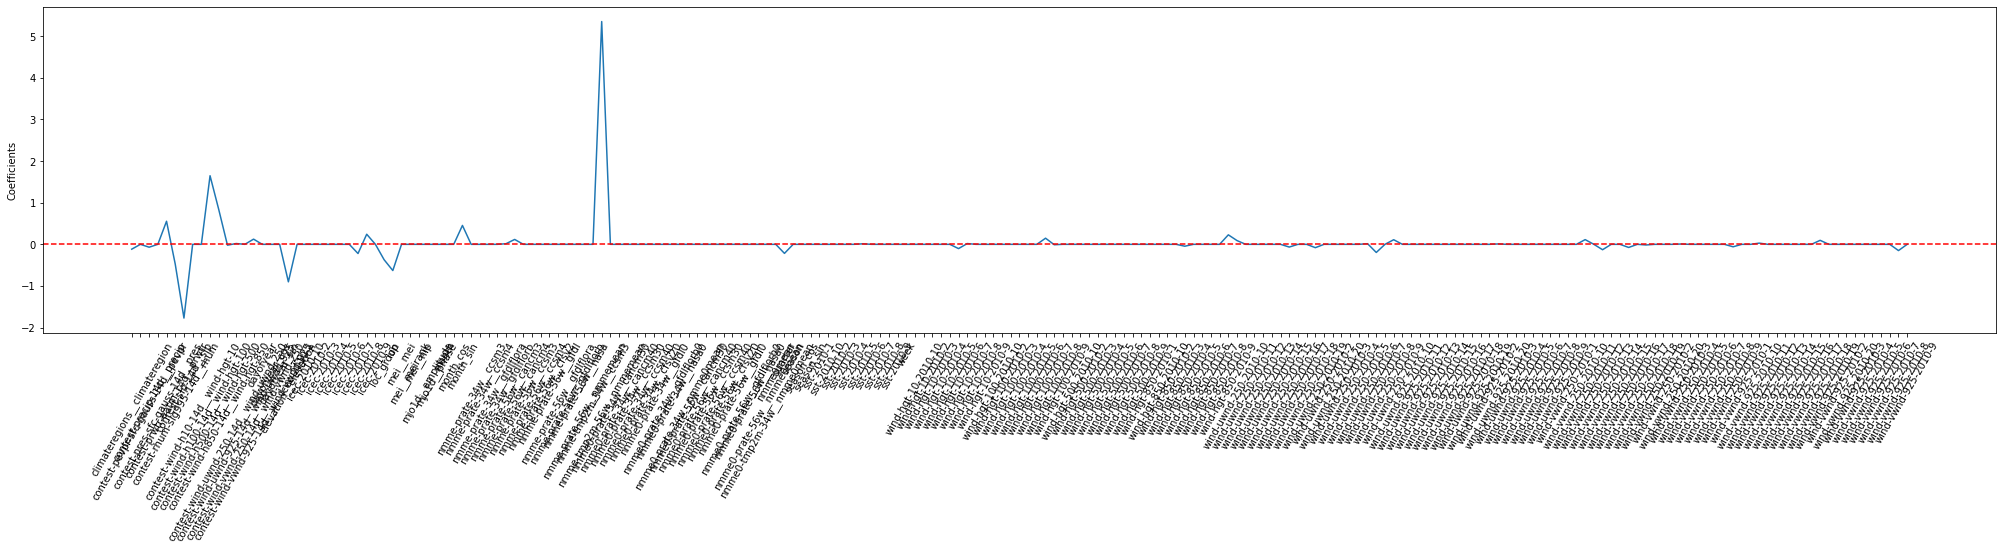

In [ ]:
# Create the model
lasso = Lasso(alpha=0.1)

# Fit the model to the training data
lasso.fit(X_train, y_train)

# Extract the coefficients
lasso_coef = lasso.coef_

# Plot the coefficients
plt.figure(figsize=(35, 6))
plt.plot(range(len(X_train.columns)), lasso_coef)
plt.xticks(range(len(X_train.columns)), X_train.columns, rotation=60)
plt.axhline(0.0, linestyle='--', color='r')
plt.ylabel('Coefficients')

**Observations**
<br>
- Coefficients that are zero indicate that the corresponding feature is not important: When the Lasso algorithm shrinks the coefficient of a feature to zero, it effectively removes that feature from the model. 
- This means that features with coefficients of zero can be safely ignored, as they are not contributing to the model.

In [ ]:
# Get an array of the column names where the coefficient is equal to zero
zero_coef = np.abs(lasso.coef_) == 0
zero_coef_cols = np.array(list(X.columns))[zero_coef]

print(len(zero_coef_cols))
print(zero_coef_cols)

161
['contest-pevpr-sfc-gauss-14d__pevpr' 'contest-pres-sfc-gauss-14d__pres'
 'contest-wind-h10-14d__wind-hgt-10' 'contest-wind-h100-14d__wind-hgt-100'
 'contest-wind-vwnd-250-14d__wind-vwnd-250' 'dayofyear' 'dayofyear_cos'
 'dayofyear_sin' 'icec-2010-1' 'icec-2010-10' 'icec-2010-2' 'icec-2010-3'
 'icec-2010-4' 'icec-2010-5' 'icec-2010-6' 'icec-2010-9' 'mei__mei'
 'mei__meirank' 'mjo1d__amplitude' 'mjo1d__phase' 'month' 'month_cos'
 'nmme-prate-34w__ccsm3' 'nmme-prate-34w__ccsm4'
 'nmme-prate-34w__gfdlflora' 'nmme-prate-34w__gfdlflorb'
 'nmme-prate-56w__ccsm3' 'nmme-prate-56w__ccsm4' 'nmme-prate-56w__cfsv2'
 'nmme-prate-56w__gfdl' 'nmme-prate-56w__gfdlflora'
 'nmme-prate-56w__gfdlflorb' 'nmme-prate-56w__nasa'
 'nmme-prate-56w__nmmemean' 'nmme-tmp2m-34w__ccsm3'
 'nmme0-prate-34w__cancm30' 'nmme0-prate-34w__cancm40'
 'nmme0-prate-34w__ccsm30' 'nmme0-prate-34w__ccsm40'
 'nmme0-prate-34w__cfsv20' 'nmme0-prate-34w__gfdl0'
 'nmme0-prate-34w__gfdlflorb0' 'nmme0-prate-34w__nasa0'
 'nmme0-prate

In [ ]:
# Drop these columns from training, validation and test data
X_train.drop(columns=zero_coef_cols, inplace=True)
X_valid.drop(columns=zero_coef_cols, inplace=True)
test_X.drop(columns=zero_coef_cols, inplace=True)

print(X_train.shape)
print(X_valid.shape)
print(test_X.shape)

(300587, 44)
(75147, 44)
(31354, 44)


In [ ]:
# Reset the indices of the DataFrame
X_train = X_train.reset_index(drop=True)
X_valid = X_valid.reset_index(drop=True)
test_X = test_X.reset_index(drop=True)

## Gradient Boost Regressor


In [ ]:
# Initialize the model
gbr = GradientBoostingRegressor(
    n_estimators=2500,
    learning_rate=0.01,
    max_depth=4,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    subsample=0.8
)

# Split the training data into folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop over the folds and train the model on each fold
for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train)):
    # Split the data into training and validation sets for this fold
    X_fold_train, y_fold_train = X_train.iloc[train_idx], y_train.iloc[train_idx]
    X_fold_val, y_fold_val = X_train.iloc[val_idx], y_train.iloc[val_idx]

    # Train the model on the training data for this fold
    gbr.fit(X_fold_train, y_fold_train)

    # Compute the RMSE score on the validation data for this fold
    y_pred_val = gbr.predict(X_fold_val)
    rmse = np.sqrt(mean_squared_error(y_fold_val, y_pred_val))

    # Print the RMSE score for this fold
    print(f"Fold {fold_idx+1} RMSE score: {rmse:.4f}")

Fold 1 RMSE score: 2.1325


# Making the Baseline Submission

In [ ]:
# submission = pd.read_csv('/kaggle/input/widsdatathon2023/sample_solution.csv') 
submission = pd.read_csv('data/sample_solution.csv')
submission.head()

In [ ]:
X_train.head()

In [ ]:
test_X.head()

In [ ]:
train_cols = X_train.columns.tolist()

# Reindex the test dataset to match the column order of the train dataset
test_X = test_X.reindex(columns=train_cols)

test_X.head()

In [ ]:
submission['contest-tmp2m-14d__tmp2m'] = gbr.predict(test_X)
submission

In [ ]:
submission.to_csv('submission_grb.csv', index = False) 

# Resources
- [Part 2 : Using Machine Learning to Predict Fitbit Sleep Scores](https://towardsdatascience.com/using-machine-learning-to-predict-fitbit-sleep-scores-496a7d9ec48)
- [Part 3 : Cross-Validation and Hyperparameter Tuning: How to Optimise your Machine Learning Model](https://towardsdatascience.com/cross-validation-and-hyperparameter-tuning-how-to-optimise-your-machine-learning-model-13f005af9d7d)